In [103]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import datetime
import re

## Data Preparation

In [104]:
twitter_df_1 = pd.read_csv("twitter_df_1.csv")
twitter_df_2 = pd.read_csv("twitter_df_2.csv")

In [105]:
twitter_df_1.head()

,row,id,date,query,handle,tweet
0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [106]:
twitter_df_1.tail()

,row,id,date,query,handle,tweet
11600,815947,1551272624,Sat Apr 18 08:36:43 PDT 2009,NO_QUERY,TeresaBrazen,"(shade, not shad) the permanence of typos in..."
11601,815951,1551272818,Sat Apr 18 08:36:46 PDT 2009,NO_QUERY,adiktusnine,@kaymania hey kay welcome back to twittering?...
11602,815974,1551273519,Sat Apr 18 08:36:52 PDT 2009,NO_QUERY,chaucolate,Wanted to see wassup with the twitter craze
11603,816017,1551302841,Sat Apr 18 08:41:42 PDT 2009,NO_QUERY,mnrmg,I had a dream that my twitter picture changed ...
11604,816168,1551335161,Sat Apr 18 08:47:01 PDT 2009,NO_QUERY,martinaarseth,I'm new on twitter


In [107]:
twitter_df_2.head()

,row,id,date,query,handle,tweet
0,816217,1551363926,Sat Apr 18 08:51:43 PDT 2009,NO_QUERY,kelliekano,@Dragoncade I see you're delivering your daily...
1,816220,1551364021,Sat Apr 18 08:51:44 PDT 2009,NO_QUERY,reesypants,@reedoh Hello lovely! Wow it's great to hear f...
2,816226,1551364223,Sat Apr 18 08:51:46 PDT 2009,NO_QUERY,IsJonas,A big mean asshole messed up my twitter.. so t...
3,816284,1551393580,Sat Apr 18 08:56:33 PDT 2009,NO_QUERY,KristinNewman,twitter...jitter...all the same
4,816296,1551393991,Sat Apr 18 08:56:37 PDT 2009,NO_QUERY,mikemonty,just updated his twitter profile's design Che...


In [108]:
twitter_df_2.tail()

,row,id,date,query,handle,tweet
15662,1599740,2193526868,Tue Jun 16 08:34:42 PDT 2009,NO_QUERY,ctycty,bye twitter . restin' time ! nite
15663,1599801,2193529738,Tue Jun 16 08:34:56 PDT 2009,NO_QUERY,JanetEatWorld1,Haha yess making maria get a twitter
15664,1599818,2193551216,Tue Jun 16 08:36:40 PDT 2009,NO_QUERY,ODonnell1888,twitter virginity broken
15665,1599860,2193552958,Tue Jun 16 08:36:49 PDT 2009,NO_QUERY,angelxwarrior,"@kazzc22 no probs kazz hun,i think theres a ne..."
15666,1599905,2193575079,Tue Jun 16 08:38:38 PDT 2009,NO_QUERY,CaraIsaac,@SarahG8s lol i wasnt on about the burns lol i...


In [109]:
twitter_df = pd.concat([twitter_df_1, twitter_df_1])

In [110]:
twitter_df.head()

,row,id,date,query,handle,tweet
0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [111]:
twitter_df.tail()

,row,id,date,query,handle,tweet
11600,815947,1551272624,Sat Apr 18 08:36:43 PDT 2009,NO_QUERY,TeresaBrazen,"(shade, not shad) the permanence of typos in..."
11601,815951,1551272818,Sat Apr 18 08:36:46 PDT 2009,NO_QUERY,adiktusnine,@kaymania hey kay welcome back to twittering?...
11602,815974,1551273519,Sat Apr 18 08:36:52 PDT 2009,NO_QUERY,chaucolate,Wanted to see wassup with the twitter craze
11603,816017,1551302841,Sat Apr 18 08:41:42 PDT 2009,NO_QUERY,mnrmg,I had a dream that my twitter picture changed ...
11604,816168,1551335161,Sat Apr 18 08:47:01 PDT 2009,NO_QUERY,martinaarseth,I'm new on twitter


In [112]:
print(twitter_df.shape)

(23210, 6)


In [113]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23210 entries, 0 to 11604
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   row     23210 non-null  int64 
 1   id      23210 non-null  int64 
 2   date    23210 non-null  object
 3   query   23210 non-null  object
 4   handle  23210 non-null  object
 5   tweet   23210 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.2+ MB


In [114]:
twitter_df = twitter_df.reset_index()
twitter_df.head()

,index,row,id,date,query,handle,tweet
0,0,9,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
1,1,224,1467871661,Mon Apr 06 22:35:41 PDT 2009,NO_QUERY,ciairuhh,"I miss you twitter. My phone broke, now I'm us..."
2,2,231,1467872181,Mon Apr 06 22:35:50 PDT 2009,NO_QUERY,admdrw,@charlietm I know right. I dunno what is going...
3,3,562,1467951568,Mon Apr 06 22:57:59 PDT 2009,NO_QUERY,spcake,@chordsy - why am I the last to find out about...
4,4,611,1467966271,Mon Apr 06 23:02:00 PDT 2009,NO_QUERY,leelaaa,finding it really hard to use twitter


In [115]:
twitter_df = twitter_df[['date','tweet']]
twitter_df.head()

,date,tweet
0,Mon Apr 06 22:20:09 PDT 2009,@twittera que me muera ?
1,Mon Apr 06 22:35:41 PDT 2009,"I miss you twitter. My phone broke, now I'm us..."
2,Mon Apr 06 22:35:50 PDT 2009,@charlietm I know right. I dunno what is going...
3,Mon Apr 06 22:57:59 PDT 2009,@chordsy - why am I the last to find out about...
4,Mon Apr 06 23:02:00 PDT 2009,finding it really hard to use twitter


In [116]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'])
twitter_df.head()

,date,tweet
0,2009-04-06 22:20:09,@twittera que me muera ?
1,2009-04-06 22:35:41,"I miss you twitter. My phone broke, now I'm us..."
2,2009-04-06 22:35:50,@charlietm I know right. I dunno what is going...
3,2009-04-06 22:57:59,@chordsy - why am I the last to find out about...
4,2009-04-06 23:02:00,finding it really hard to use twitter


In [117]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23210 entries, 0 to 23209
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    23210 non-null  datetime64[ns]
 1   tweet   23210 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 362.8+ KB


In [118]:
# functions to apply to tweets

def rm_http(tweet):
    tweet = re.sub(r"https\S+","",tweet)
    return tweet

def rm_spec_chars(tweet):
    pattern = r'[^a-zA-Z0-9\s]'
    tweet = re.sub(pattern,"",tweet)
    return tweet

def rm_whitespace(tweet):
    tweet = tweet.strip(" ")
    return " ".join(tweet.split())

def polarity_score(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return - 1

def polarity_word(x):
    if (x < 0):
        return "negative"
    elif (x == 0):
        return "neutral"
    else:
        return "positive"

In [119]:
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_http)
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_spec_chars)
twitter_df['tweet'] = twitter_df['tweet'].apply(func = rm_whitespace)
twitter_df.head()

,date,tweet
0,2009-04-06 22:20:09,twittera que me muera
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...
4,2009-04-06 23:02:00,finding it really hard to use twitter


In [120]:
twitter_df.tweet[0]

'twittera que me muera'

In [121]:
twitter_df.loc[0][1]

'twittera que me muera'

In [122]:
from textblob import TextBlob

In [123]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [124]:
import nltk
from nltk.stem import WordNetLemmatizer

In [125]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\benmc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [126]:
lemmatizer = WordNetLemmatizer()

In [127]:
twitter_df['lemmatizer'] = twitter_df['tweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

In [128]:
twitter_df

,date,tweet,lemmatizer
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter
...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...


### Sentiment Analysis

In [129]:
twitter_df['polarity_scores'] = twitter_df['lemmatizer'].map(lambda text: TextBlob(text).sentiment.polarity)

In [130]:
twitter_df

,date,tweet,lemmatizer,polarity_scores
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera,0.000000
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667
...,...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000


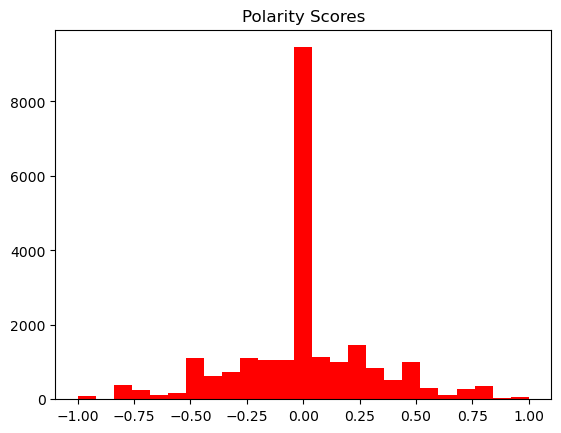

In [131]:
plt.hist(twitter_df['polarity_scores'], bins = 25, color = "red")
plt.title('Polarity Scores')
plt.show()

In [132]:
twitter_df['subjectivity_scores'] = twitter_df['lemmatizer'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

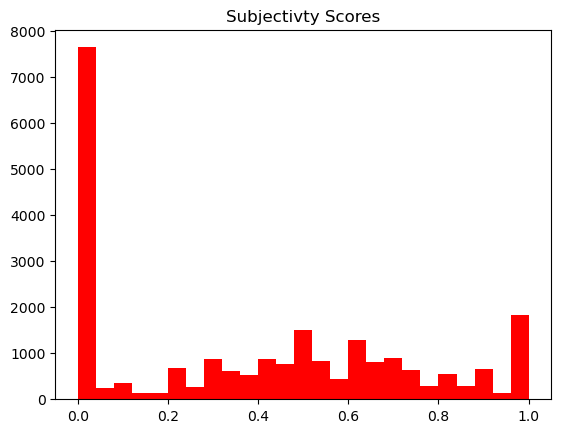

In [133]:
plt.hist(twitter_df['subjectivity_scores'], bins = 25, color = "red")
plt.title('Subjectivty Scores')
plt.show()

In [134]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [135]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [136]:
vader_scores[0]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [137]:
analyzer = SentimentIntensityAnalyzer()
vader_scores = twitter_df['lemmatizer'].apply(analyzer.polarity_scores)
vader = []
for i in vader_scores:
    vader.append(i['compound'])
twitter_df['vader_scores'] = vader

In [138]:
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06 22:20:09,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000
1,2009-04-06 22:35:41,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126
2,2009-04-06 22:35:50,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000
3,2009-04-06 22:57:59,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612
4,2009-04-06 23:02:00,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761
...,...,...,...,...,...,...
23205,2009-04-18 08:36:43,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772
23206,2009-04-18 08:36:46,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442
23207,2009-04-18 08:36:52,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531
23208,2009-04-18 08:41:42,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500


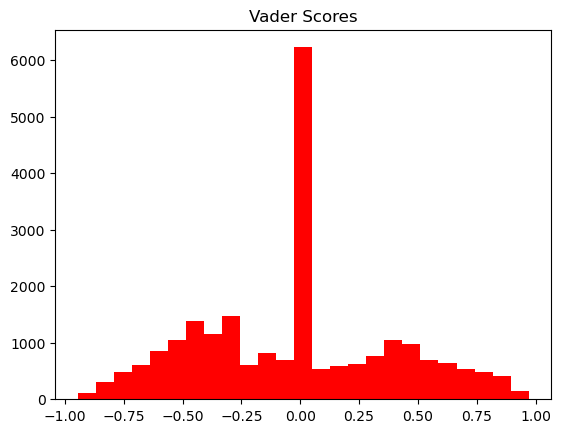

In [139]:
plt.hist(twitter_df['vader_scores'], bins = 25, color = "red")
plt.title('Vader Scores')
plt.show()

In [140]:
from datetime import datetime,date

In [141]:
d = datetime.now()

In [142]:
twitter_df['date'] = [d.date() for d in twitter_df["date"]]
twitter_df

,date,tweet,lemmatizer,polarity_scores,subjectivity_scores,vader_scores
0,2009-04-06,twittera que me muera,twittera que me muera,0.000000,0.000000,0.0000
1,2009-04-06,I miss you twitter My phone broke now Im using...,I miss you twitter My phone broke now Im using...,-0.800000,1.000000,-0.8126
2,2009-04-06,charlietm I know right I dunno what is going o...,charlietm I know right I dunno what is going o...,0.285714,0.535714,0.0000
3,2009-04-06,chordsy why am I the last to find out about th...,chordsy why am I the last to find out about th...,0.000000,0.066667,0.3612
4,2009-04-06,finding it really hard to use twitter,finding it really hard to use twitter,-0.291667,0.541667,-0.1761
...,...,...,...,...,...,...
23205,2009-04-18,shade not shad the permanence of typos in twit...,shade not shad the permanence of typo in twitt...,0.000000,0.000000,-0.0772
23206,2009-04-18,kaymania hey kay welcome back to twittering Lo...,kaymania hey kay welcome back to twittering Lo...,0.533333,0.533333,0.8442
23207,2009-04-18,Wanted to see wassup with the twitter craze,Wanted to see wassup with the twitter craze,0.000000,0.000000,-0.1531
23208,2009-04-18,I had a dream that my twitter picture changed ...,I had a dream that my twitter picture changed ...,0.000000,0.000000,0.2500


In [150]:
twitter_df['date'] = pd.to_datetime(twitter_df['date'], format='%m-%d-%Y')

In [151]:
# aggregating the scores for each date in the dataset by computing the average
test = twitter_df.groupby('date')['polarity_scores'].mean().reset_index() 

In [152]:
test.set_index('date', inplace=True)

In [153]:
test

,polarity_scores
date,
2009-04-06,0.120844
2009-04-07,0.112132
2009-04-17,0.144619
2009-04-18,0.065280
2009-04-19,0.010066
2009-04-20,0.028759
2009-04-21,0.010661
2009-05-01,-0.002521
2009-05-02,0.006066


In [154]:
test.resample('D').ffill().reset_index()

,date,polarity_scores
0,2009-04-06,0.120844
1,2009-04-07,0.112132
2,2009-04-08,0.112132
3,2009-04-09,0.112132
4,2009-04-10,0.112132
...,...,...
76,2009-06-21,-0.023605
77,2009-06-22,-0.022489
78,2009-06-23,-0.004007
79,2009-06-24,0.011209


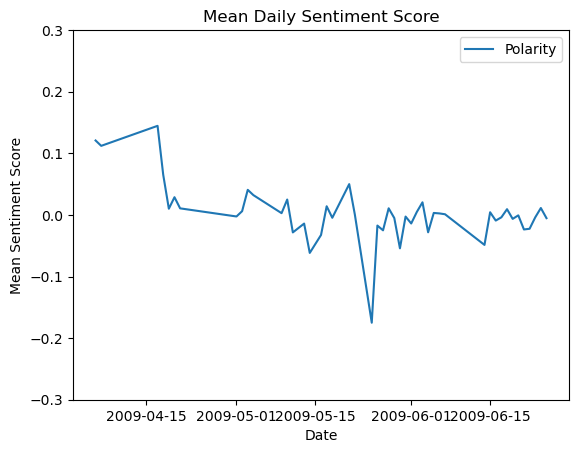

In [161]:
plt.plot(test["polarity_scores"], label = "Polarity")
plt.title("Mean Daily Sentiment Score")   
plt.xlabel("Date")
plt.ylabel("Mean Sentiment Score")
plt.legend()
ax = plt.gca()
ax.set_ylim([-0.3,0.3])
plt.show()